# **Tugas 1**

Anggota Kelompok:
1. Michael Rich Kharisma - 2106724901
2. Kalisha Rahma Firza - 2106725053
3. Ricky - 2106724952
4. Kayla Adzka Amanda B. - 2106637662
5. Bob Rahman Hakim - 2106726863

**Gaussian Mixture Model**

Gaussian Mixture Models (GMM) efektif untuk representasi densitas multimodel. Pada eksperimen ini Parameter GMM diestimasi dengan menggunakan algoritma Expectation Maximization (EM) yang hasilnya ditampilkan untuk dataset yang diberikan pada link berikut: https://archive.ics.uci.edu/ml/datasets/iris

Pertanyaan:

A. Cobalah lakukan pengelompokan pada data 2d:
a. PetalLenght vs Petal witdh
b. SepalLenght vs Sepal width

 dan lihat apakah dapat menghasilkan cluster yang sebenarnya? (bayangkan kita tidak memiliki label spesies pada data ini dan ingin membagi bunga menjadi beberapa spesies)

Anda boleh memodifikasi jumlah cluster yang berubah-ubah dengan pendekatan berikut:
1. Pendekatan K-Means Clustering
2. Pendekatan GMM 
3. Pendekatan GMM menggunakan EM

B. Prediksi cluster untuk setiap titik data untuk pendekatan K-Means Clustering dan GMM pada ke dua data 2D di atas. Analisalah hasil perbandingan dari K-Means Clustering dan GMM Clustering.



Model campuran Gaussian dengan struktur kovarians yang berbeda:
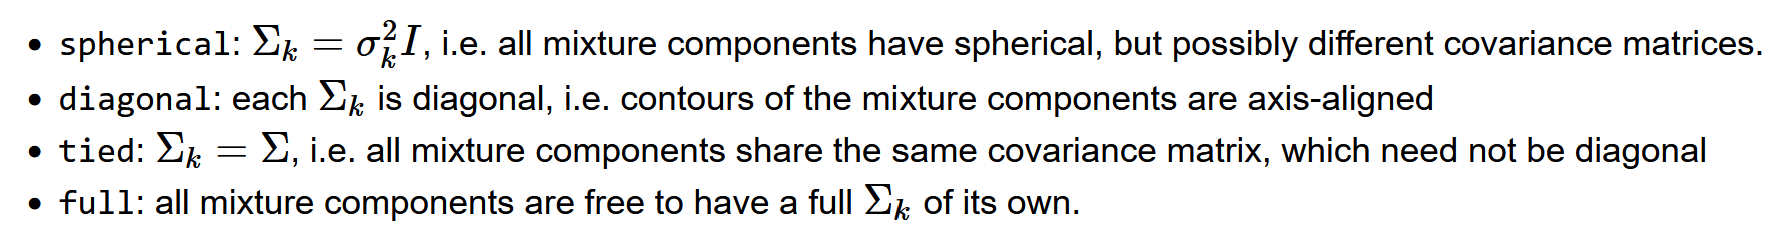

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gianiarda/latihan2/main/Iris.csv'
data = pd.read_csv(url)

In [ ]:
print(data)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
107,108,7.3,2.9,6.3,1.8,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
87,88,6.3,2.3,4.4,1.3,Iris-versicolor


In [ ]:
# split data into features (X) and labels (y)
X = data.iloc[:,1:5]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
91             6.1           3.0            4.6           1.4
2              4.7           3.2            1.3           0.2
103            6.3           2.9            5.6           1.8
83             6.0           2.7            5.1           1.6
57             4.9           2.4            3.3           1.0
97    Iris-versicolor
30        Iris-setosa
92    Iris-versicolor
5         Iris-setosa
47        Iris-setosa
Name: Species, dtype: object


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# see how many samples we have of each species 
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Sepal Width vs Sepal Length

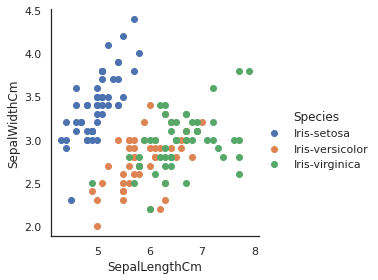

In [ ]:
# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

In [ ]:
from sklearn import preprocessing

X_scaled = data.iloc[:,[1,2]].values

### k-Means

In [ ]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

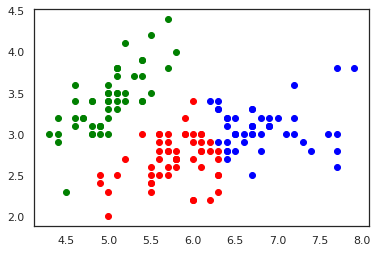

In [ ]:
pred=km.predict(X_scaled)
frame=pd.DataFrame(X_scaled)
frame['cluster']=pred
frame.columns=['SepalLengthCm', 'SepalWidthCm', 'cluster']

color=['red', 'green', 'blue', 'yellow']
for k in range (0,3):
  df_1=frame[frame['cluster']==k]
  plt.scatter(df_1['SepalLengthCm'],df_1['SepalWidthCm'], c=color[k])
plt.show()

### GMM

In [ ]:
# Pendekatan GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
from sklearn import cluster, datasets

colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']

#load iris data; pairwise plots
iris = datasets.load_iris()

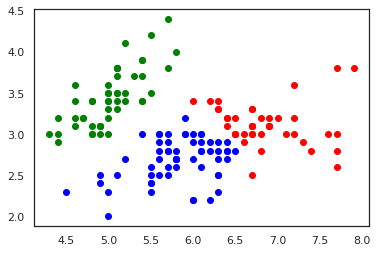

In [ ]:
#visualisasi GMM untuk sepal length vs width
labels=gmm.predict(X_scaled)
frame = pd.DataFrame(X_scaled)
frame['cluster']=labels
frame.columns=['SepalLengthCm', 'SepalWidthCm', 'cluster']

color=['red', 'green', 'blue', 'yellow']
for k in range (0,3):
  X_scaled_2=frame[frame['cluster']==k]
  plt.scatter(X_scaled_2['SepalLengthCm'],X_scaled_2['SepalWidthCm'], c=color[k])
plt.show()

### GMM with EM

In [ ]:
# Pendekatan GMM dengan EM
# Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,0:2]) ## fits mixture model menggunakan EM

In [ ]:
#helper function to visualise covariance structure of fitted Gaussian components
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

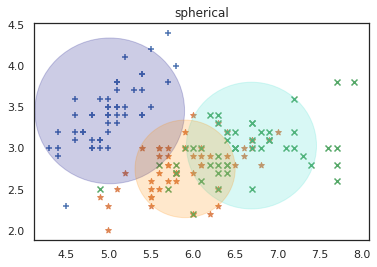

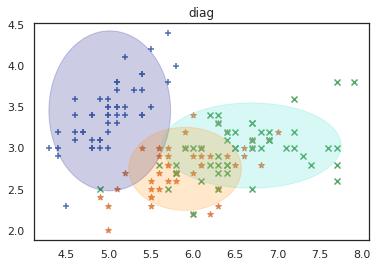

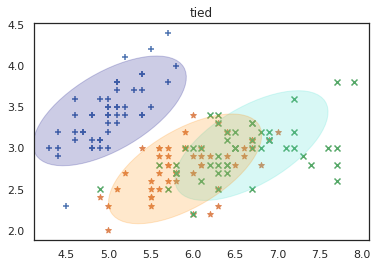

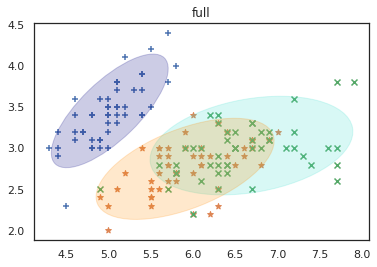

In [ ]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()


# Petal Width vs Petal Length

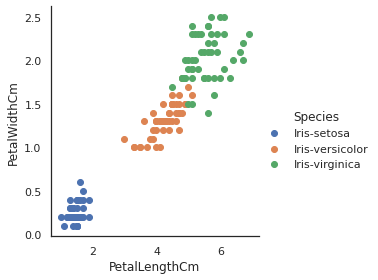

In [ ]:
# do same for petals
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

In [ ]:
# untuk petal width vs petal length
from sklearn import preprocessing

X_scaled = data.iloc[:,[3,4]].values

### k-Means

In [ ]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

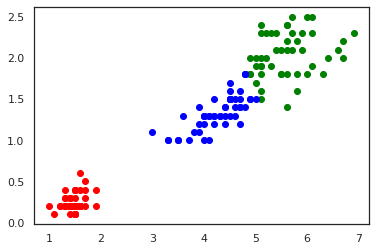

In [ ]:
pred=km.predict(X_scaled)
frame=pd.DataFrame(X_scaled)
frame['cluster']=pred
frame.columns=['PetalLengthCm', 'PetalWidthCm', 'cluster']

color=['red', 'green', 'blue', 'yellow']
for k in range (0,3):
  df_1=frame[frame['cluster']==k]
  plt.scatter(df_1['PetalLengthCm'],df_1['PetalWidthCm'], c=color[k])
plt.show()

### GMM

In [ ]:
# Pendekatan GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn import cluster, datasets

colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']

#load iris data; pairwise plots
iris = datasets.load_iris()

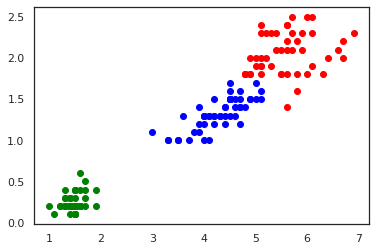

In [ ]:
#visualisasi GMM untuk petal length vs width
labels=gmm.predict(X_scaled)
frame = pd.DataFrame(X_scaled)
frame['cluster']=labels
frame.columns=['PetalLengthCm', 'PetalWidthCm', 'cluster']

color=['red', 'green', 'blue', 'yellow']
for k in range (0,3):
  X_scaled_2=frame[frame['cluster']==k]
  plt.scatter(X_scaled_2['PetalLengthCm'],X_scaled_2['PetalWidthCm'], c=color[k])
plt.show()

In [ ]:
# Pendekatan GMM dengan EM
# Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

In [ ]:
#helper function to visualise covariance structure of fitted Gaussian components
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

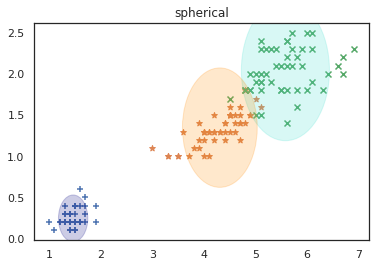

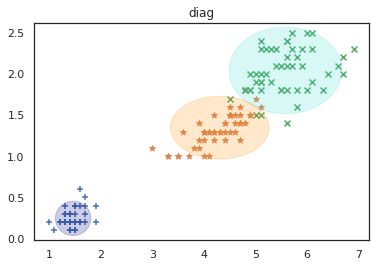

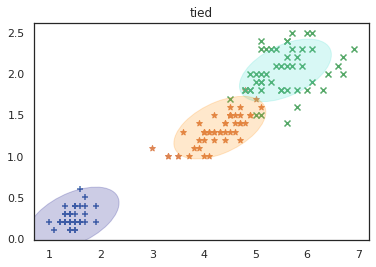

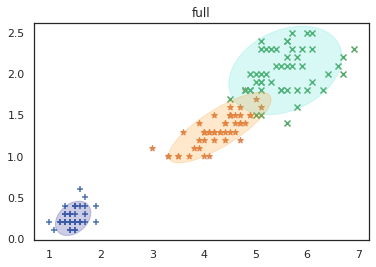

In [ ]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()


# Perbandingan score k-Means dan GMM

In [ ]:
nclusters = 3 # nilai k
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict cluster untuk setiap data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
#untuk k = 3 menggunakan silhouette
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.6602760882193361

In [ ]:
#untuk k = 3 menggunakan adjusted rand
from sklearn.metrics.cluster import adjusted_rand_score

# first let's see how the k-means clustering did - 
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.8856970310281228

In [ ]:
# k means untuk k = 5
nclusters = 5 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 4, 2, 4, 4, 2, 1, 2, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 4, 4, 2, 1, 4, 2, 1, 1, 4, 4, 2, 2,
       4, 1, 4, 2, 4, 4, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
#untuk k = 5 menggunakan adjusted rand
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.669859760385294

# Hasil Analisa

Berdasarkan hasil perhitungan menggunakan kmeans dan GMM diperoleh bahwa:

**Clustering** terbaik apabila data visualisasinya berbentuk sirkular. Sehingga dari hasil yang diperoleh di atas, dapat disimpulkan bahwa untuk **petal length** vs **petal width** dan **sepal length** vs **sepal width**, model clustering GMM lebih baik dibanding K Means dan GMM with EM lebih baik dibanding GMM. 

Hasil score untuk n yang berbeda masing-masing menghasilkan nilai yang berbeda. Untuk k=3 diperoleh:
1. **Silhouette Score** = 0.6602760882193361
2. **Adjusted Rand** = 0.8856970310281228

Sedangkan untuk k=5 diperoleh:
1. **Adjusted Rand** = 0.669859760385294

Maka dapat disimpulkan bahwa ketika k=3 diperoleh score yang lebih baik yaitu mendekati 1 dibandingkan dengaan score ketika k=5.